## Dataset Documentation
---
#### Relevant csv files selected from the [Gapminder website](https://www.gapminder.org/data/):
1. **Human Development Index (HDI):**<br>
_An index used to rank countries by level of "human development". It is calculated from three dimensions: health level, educational level and living standard._<br>
File: `hdi_human_development_index.csv` <br><br>
2. **Aged 15+ Employment Rate (%):**<br>_Percentage of total population, age group 15+, that has been employed during the given year_.<br>
File: `aged_15plus_employment_rate_percent.csv`<br><br>
3. **Income per person (GDP/capita, PPP inflation-adjusted):** _Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP)._<br>
File: `income_per_person_gdppercapita_ppp_inflation_adjusted.csv`<br><br>
4. **Life Expectancy (Years):**<br>_The average number of years a newborn child would live if current mortality patterns were to stay the same_.<br>
File: `life_expectancy_years.csv`<br><br>
5. **Babies per woman (total fertility):**<br>_The number of children that would be born to each woman with prevailing age-specific fertility rates_.<br>
File: `children_per_woman_total_fertility.csv`<br><br>
6. **Population Density (per square km):**<br>_Average number of people on each square km of the land in the given country._<br>
File: `population_density_per_square_km.csv`<br><br>
7. **Civil liberties Index (IDEA):**<br>_A measure denoting the extent to which civil rights and liberties are respected (on a scale of 1 - 100). The factors considered in its estimation includes freedom of expression, freedom of association and assembly, freedom of religion, freedom of movement, and personal integrity and security._<br>
File: `cliberties_idea.csv`<br><br>

#### Relevant csv files selected from the [Gapminder github page](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv):
8. **`ddf--entities--geo--country.csv`:** <br>_Contains information about different countries, the continents they belong to and their respective world bank regions_.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Load all dataframes
employment_df = pd.read_csv('./csv_files/aged_15plus_employment_rate_percent.csv')
locations_df = pd.read_csv('./csv_files/ddf--entities--geo--country.csv')
hdi_df = pd.read_csv('./csv_files/hdi_human_development_index.csv')
income_df = pd.read_csv('./csv_files/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
fertility_df = pd.read_csv('./csv_files/children_per_woman_total_fertility.csv')
life_df = pd.read_csv('./csv_files/life_expectancy_years.csv')
population_df = pd.read_csv('./csv_files/population_density_per_square_km.csv')
civil_df = pd.read_csv('./csv_files/cliberties_idea.csv')

## Previewing Dataframes
---

In [3]:
employment_df.head(2)

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,42.5,42.5,42.5,42.5,42.4,42.4,42.3,42.2,42.2,...,42.3,42.4,42.5,42.7,42.9,43.0,43.2,43.4,43.5,41.5
1,Angola,75.0,75.0,75.2,75.1,74.9,74.9,74.8,74.7,74.6,...,71.7,71.8,71.8,71.9,71.9,72.0,72.1,72.1,72.1,69.6


In [4]:
locations_df.head(2)

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,west_and_rest,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,Abkhazia,NaN,NaN,False,NaN,NaN,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,...,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AW,NaN,americas,america


In [5]:
hdi_df.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [6]:
income_df.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720


In [7]:
fertility_df.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74


In [8]:
life_df.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0


In [9]:
population_df.head(2)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,211,213,216,223,232,243,255,268,281,...,576,575,574,573,572,572,571,570,569,568
1,Afghanistan,11.9,12,12.2,12.3,12.5,12.7,12.9,13.1,13.3,...,117,117,117,117,116,116,116,115,115,115


In [10]:
civil_df.head(2)

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,33.1,32.8,32.9,21.7,16.5,17.8,18.9,18.3,18.2,...,48.5,49.3,51.4,49.1,49.1,48.7,47.0,47.1,50.0,44.5
1,Angola,16.2,17.3,15.1,15.1,15.3,17.3,17.4,17.4,18.1,...,44.6,43.5,44.0,42.8,42.9,42.7,43.8,44.9,48.5,49.6


## Selecting Columns to Utilize
---

In [11]:
# Select common columns from all dataframes
wanted_columns = employment_df.columns[:-1]
# Define a function to perform the trimming process
def trim_df(df, columns):
    """ Returns modified copy of passed dataframe, sliced by specified columns """
    return df[columns]

In [12]:
# Trim all dataframes down to the wanted columns
hdi_df = trim_df(hdi_df, wanted_columns)
income_df = trim_df(income_df, wanted_columns)
life_df = trim_df(life_df, wanted_columns)
civil_df = trim_df(civil_df, wanted_columns)
population_df = trim_df(population_df, wanted_columns)
fertility_df = trim_df(fertility_df, wanted_columns)

From **`locations_df`** we only need the `name`, `world4_region` and `world6_region` columns:

In [13]:
# Select wanted columns from locations_df
locations_df = locations_df[['name', 'world_4region', 'world_6region']]

In [14]:
# Create a list of all dataframes
df_list = [locations_df, hdi_df, employment_df, income_df, life_df, civil_df, population_df, fertility_df]

# Preview our column selection results
for df in df_list:
    print(df.columns)
    print('-'*80)

Index(['name', 'world_4region', 'world_6region'], dtype='object')
--------------------------------------------------------------------------------
Index(['country', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['country', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['country', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999'

## Transposing Our Data
---

In [15]:
def melt_df(df, name):
    """ Converts a dataframe into a long format with all years in one column """
    return pd.melt(df, id_vars=['country'], value_name=name, var_name='year')

In [16]:
employment_df = melt_df(employment_df, 'empl_rate')
hdi_df = melt_df(hdi_df, 'hdi_score')
income_df = melt_df(income_df, 'income_pp')
life_df = melt_df(life_df, 'life_exp')
civil_df = melt_df(civil_df, 'lib_score')
population_df = melt_df(population_df, 'pop_density')
fertility_df = melt_df(fertility_df, 'fert_rate')

In [17]:
df_list = [locations_df, hdi_df, employment_df, income_df, life_df, civil_df, population_df, fertility_df]
# Preview our transposed data
for df in df_list[1:]:
    print(df.head())
    print('-'*50)

                country  year  hdi_score
0           Afghanistan  1991      0.307
1                Angola  1991        NaN
2               Albania  1991      0.631
3               Andorra  1991        NaN
4  United Arab Emirates  1991      0.735
--------------------------------------------------
                country  year  empl_rate
0           Afghanistan  1991       42.5
1                Angola  1991       75.0
2               Albania  1991       57.8
3  United Arab Emirates  1991       71.8
4             Argentina  1991       57.3
--------------------------------------------------
                country  year income_pp
0           Afghanistan  1991      1010
1                Angola  1991      1650
2               Albania  1991      3510
3               Andorra  1991     31.3k
4  United Arab Emirates  1991     50.3k
--------------------------------------------------
                country  year  life_exp
0           Afghanistan  1991      53.8
1                Angola  1991      

## Combining Our Data
---
First, we will assign descriptive names to the columns in `location_df`:

In [18]:
locations_df.rename(columns={'name': 'country',
                            'world_4region': 'continent',
                            'world_6region':'region'
                           }, inplace=True)
locations_df.head(2)

,country,continent,region
0,Abkhazia,europe,europe_central_asia
1,Aruba,americas,america


In [19]:
# Merge the countries in hdi_df and their location info
combined_df = pd.merge(locations_df, hdi_df)
combined_df.head(3)

,country,continent,region,year,hdi_score
0,Afghanistan,asia,south_asia,1991,0.307
1,Afghanistan,asia,south_asia,1992,0.316
2,Afghanistan,asia,south_asia,1993,0.312


In [20]:
# Loop through and combine all dataframes
for df in (employment_df, income_df, life_df, civil_df, population_df, fertility_df):
    combined_df = pd.merge(combined_df, df, on=['country', 'year'])

# Sort each entry in the combined dataframe by country and year
combined_df.sort_values(by=['country', 'year'], inplace=True)
combined_df.head()

,country,continent,region,year,hdi_score,empl_rate,income_pp,life_exp,lib_score,pop_density,fert_rate
0,Afghanistan,asia,south_asia,1991,0.307,42.5,1010,53.8,19.1,20.4,7.48
1,Afghanistan,asia,south_asia,1992,0.316,42.5,971,54.2,21.6,22.2,7.50
2,Afghanistan,asia,south_asia,1993,0.312,42.5,665,54.4,23.0,24.2,7.54
3,Afghanistan,asia,south_asia,1994,0.307,42.5,493,53.9,21.4,26.2,7.57
4,Afghanistan,asia,south_asia,1995,0.331,42.4,728,54.3,20.8,27.7,7.61


Now that we have a combined dataframe, we can start exploring its characteristics:

In [21]:
# Explore rows and column size
print('The combined dataframe has {:,} rows and {} columns.'.format(combined_df.shape[0], combined_df.shape[1]))
# Explore duplicates
print('The combined dataframe has {:,} duplicate records.'.format(combined_df.duplicated().sum()))
print()
# Explore datatypes
print('\033[1m'+'Datatypes in the combined dataframe:'+'\033[0m')
print(combined_df.dtypes, '\n')
# Explore null values
print('\033[1m'+'Null values in each column of the combined dataframe:'+'\033[0m')
print(combined_df.isnull().sum())

The combined dataframe has 4,553 rows and 11 columns.
The combined dataframe has 0 duplicate records.

Datatypes in the combined dataframe:
country         object
continent       object
region          object
year            object
hdi_score      float64
empl_rate      float64
income_pp       object
life_exp       float64
lib_score      float64
pop_density     object
fert_rate      float64
dtype: object 

Null values in each column of the combined dataframe:
country          0
continent        0
region           0
year             0
hdi_score      224
empl_rate        0
income_pp        0
life_exp         0
lib_score       36
pop_density      0
fert_rate        0
dtype: int64


> #### Two potential problems become immediately apparent from our combined dataset:
> - **Wrong DataTypes:** Some columns with numeric data (`year`, `income_pp`, and `pop_density`) are improperly stored as string/object types.
> - **Null Values:** The `hdi_score` and `lib_score` columns contain null values.

We have to deal with these occurrences before we can proceed into proper analysis.

## Converting Data Types
---
### Year Column

In [22]:
# Fix the year column
combined_df['year'] = pd.to_datetime(combined_df['year']).dt.year

### Income Per Person Column

In [23]:
# Examine the values in the income_pp column
combined_df['income_pp'].value_counts().head()

11.9k    22
11.3k    20
10.5k    20
14.4k    19
11k      19
Name: income_pp, dtype: int64

It appears values like `11.9k`, `11.3k` among others are what caused this column to be stored as a string. These values represent data measured in _thousands_ according to the documentation on the [Gapminder page](https://www.gapminder.org/data/). We will correct this formatting below:

In [24]:
# Identify where K is present in an entry and multiply by 1000
combined_df['income_pp'] = combined_df['income_pp'].apply(lambda x: float(x[:-1])*1000 if 'k' in x else float(x))
# Preview results
combined_df['income_pp'].value_counts().head()

11900.0    22
11300.0    20
10500.0    20
14400.0    19
11000.0    19
Name: income_pp, dtype: int64

### Population Density Column

In [25]:
# Examine the values in the lib_score column 
print('\033[1m'+'Preveiwing the frequency of few values in the population density column:'+'\033[0m')
print(combined_df['pop_density'].value_counts().head(), '\n')
print('\033[1m'+'Preveiwing the frequency of more values in the population density column:'+'\033[0m')
print(combined_df['pop_density'].value_counts().tail(), '\n')
print('\033[1m'+'Conducting descriptive statistics...'+'\033[0m')
print(combined_df['pop_density'].describe())

Preveiwing the frequency of few values in the population density column:
112    44
106    31
113    30
102    29
114    28
Name: pop_density, dtype: int64 

Preveiwing the frequency of more values in the population density column:
8.82    1
53.2    1
8.52    1
8.07    1
37.3    1
Name: pop_density, dtype: int64 

Conducting descriptive statistics...
count     4553
unique    1696
top        112
freq        44
Name: pop_density, dtype: object


The values in this column dont seem to have any unusual formating. We can go ahead to convert them to the `float` data type:

In [26]:
combined_df['pop_density'] = combined_df['pop_density'].astype(float)

In [27]:
print('\033[1m'+'Rechecking the datatypes in our combined dataframe...'+'\033[0m')
combined_df.dtypes

Rechecking the datatypes in our combined dataframe...


country         object
continent       object
region          object
year             int64
hdi_score      float64
empl_rate      float64
income_pp      float64
life_exp       float64
lib_score      float64
pop_density    float64
fert_rate      float64
dtype: object

## Dealing With Missing Values
---
### Setting a Criteria to Fill Null Values

In [28]:
print('\033[1m'+'Null values in each column of the combined dataframe:'+'\033[0m')
print(combined_df.isnull().sum())

Null values in each column of the combined dataframe:
country          0
continent        0
region           0
year             0
hdi_score      224
empl_rate        0
income_pp        0
life_exp         0
lib_score       36
pop_density      0
fert_rate        0
dtype: int64


Before selecting an appropriate method of fixing the null values in the `hdi_score` and `empl_rate` columns. It would be great to have an overview of how the values in these columns are generally distributed:

Distribution of HDI Score and Employment rate across all Countries


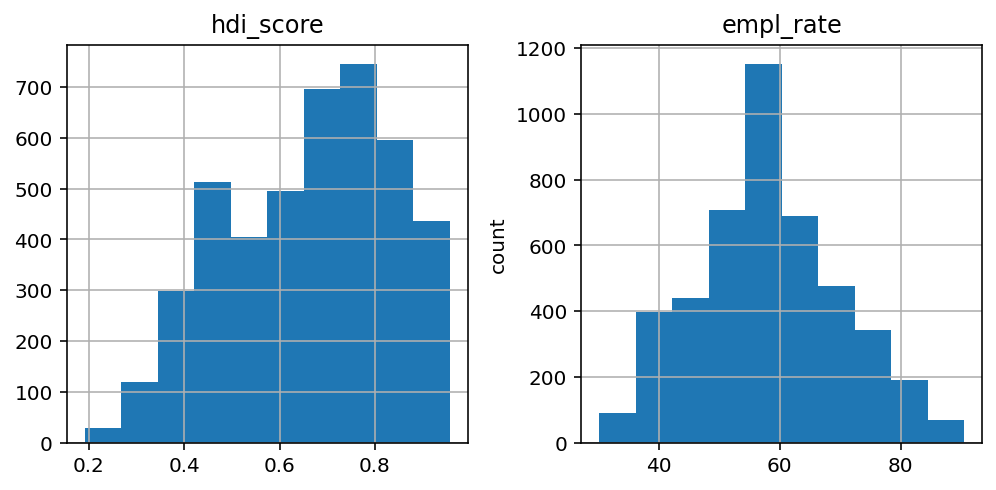

In [29]:
# Preview the distribution of values in hdi_score and empl_rate columns
print('\033[1m'+'Distribution of HDI Score and Employment rate across all Countries'+'\033[0m')
combined_df[['hdi_score', 'empl_rate']].hist(figsize=(7, 3.5))
plt.ylabel('count')
plt.tight_layout(pad=1);

> Generally, `HDI score` distribution appears to be _left skewed_ with many countries having HDI scores around the range of 0.6 to 0.8. `Employment rates`, however, show some degree of _right skew_, and the mean employment rate is around 60%.

We will avoid jumping into conclusions immediately and try to see how these distributions vary from continent to continent. This may provide us with better insight on how to account for the null values in our dataset.

In [30]:
combined_df.groupby('continent')[['hdi_score', 'empl_rate']].mean().round(2)

,hdi_score,empl_rate
continent,,
africa,0.49,61.14
americas,0.71,59.40
asia,0.67,59.12
europe,0.81,52.97


> The distribution of these measure seems to vary from continent to continent. _For instance, while HDI Scores are much lower in Africa (0.49), Africa has a higher employment rate (61%) than the rest of the world_.

**Rather than fill our null values based on the mean recorded for all the countries, we will fill them based on the mean estimated for the particular continent. This will to some extent , help us account for the variations from one continent to another**.

### Removing Countries with many missing HDI scores

In [31]:
print('Each country should have records for {} years from 1991 to 2019.'.format(len(combined_df['year'].unique())))
print('Printing countries with missing HDI scores, including the % of records missing...')
# Collate the list of countries with missing HDI scores
missing_hdi = combined_df[combined_df['hdi_score'].isnull()].groupby('country')['year'].count()
round(missing_hdi/29, 2)

Each country should have records for 29 years from 1991 to 2019.
Printing countries with missing HDI scores, including the % of records missing...


country
Angola                    0.28
Azerbaijan                0.14
Belarus                   0.14
Bosnia and Herzegovina    0.31
Burkina Faso              0.31
Cape Verde                0.31
Chad                      0.31
Equatorial Guinea         0.31
Eritrea                   0.48
Ethiopia                  0.31
Georgia                   0.31
Guinea-Bissau             0.48
Lebanon                   0.48
Liberia                   0.28
Madagascar                0.31
Nigeria                   0.41
North Macedonia           0.31
Oman                      0.31
South Sudan               0.66
Timor-Leste               0.31
Turkmenistan              0.66
Uzbekistan                0.31
Name: year, dtype: float64

We will remove countries with over **50%** of their HDI records missing:

In [32]:
# Select countries with over 50% records for HDI missing
over_50_missing = missing_hdi[missing_hdi > (0.5*29)].index
over_50_missing

Index(['South Sudan', 'Turkmenistan'], dtype='object', name='country')

In [33]:
# Eliminate the countries from the combined_df dataframe
combined_df = combined_df.query("country not in @over_50_missing")
combined_df.isnull().sum()

country          0
continent        0
region           0
year             0
hdi_score      186
empl_rate        0
income_pp        0
life_exp         0
lib_score       16
pop_density      0
fert_rate        0
dtype: int64

**Quick Observations**
- The number of null records in the `hdi_score` column have reduced from 224 to 186.
- The number of null records in `lib_score` have reduced from 36 to 16.

We can now proceed to fill the remaining null values in each country with the mean value from their respective continents:
### Filling Null Values

In [34]:
# Create slices of the the combined dataframe based on continent
continent_slices = [combined_df.query("continent == @c").copy() for c in combined_df['continent'].unique()]
# Confirm slicing process
print('Confirming the continents in each slice...')
for num, item in enumerate(continent_slices):
    print('slice_'+ str(num+1), ': '+item['continent'].unique()[0])

Confirming the continents in each slice...
slice_1 : asia
slice_2 : europe
slice_3 : africa
slice_4 : americas


In [35]:
# Filling null values in each slice
for item in continent_slices:
    hdi_mean = item['hdi_score'].mean()
    lib_mean = item['lib_score'].mean()
    item['hdi_score'].fillna(hdi_mean, inplace=True)
    item['lib_score'].fillna(lib_mean, inplace=True)

In [36]:
# Reconstructing a fully cleaned dataframe
gapminder = pd.concat([item for item in continent_slices], ignore_index=True)
# Sorting the dataframe by country and year
gapminder.sort_values(by=['country', 'year'], inplace=True)
# Reorganizing the dataframe index
gapminder = gapminder.reset_index(drop=True)
# Preview results
print('Printing: count of null values in each column of our rebuilt dataframe...')
gapminder.isnull().sum()

Printing: count of null values in each column of our rebuilt dataframe...


country        0
continent      0
region         0
year           0
hdi_score      0
empl_rate      0
income_pp      0
life_exp       0
lib_score      0
pop_density    0
fert_rate      0
dtype: int64

## Formating the String Columns
---

In [37]:
gapminder.head()

,country,continent,region,year,hdi_score,empl_rate,income_pp,life_exp,lib_score,pop_density,fert_rate
0,Afghanistan,asia,south_asia,1991,0.307,42.5,1010.0,53.8,19.1,20.4,7.48
1,Afghanistan,asia,south_asia,1992,0.316,42.5,971.0,54.2,21.6,22.2,7.50
2,Afghanistan,asia,south_asia,1993,0.312,42.5,665.0,54.4,23.0,24.2,7.54
3,Afghanistan,asia,south_asia,1994,0.307,42.5,493.0,53.9,21.4,26.2,7.57
4,Afghanistan,asia,south_asia,1995,0.331,42.4,728.0,54.3,20.8,27.7,7.61


In the final step of data cleaning, we will format the `continent` column to **Title Case**. The `region` column will also be properly capitalized and the underscores will be removed.

In [38]:
# Reformat the continent column
gapminder['continent'] = gapminder['continent'].str.title()

In [39]:
# Create a dictionary with the proper formating of all the region names
region_dictionary = {
    'south_asia' : 'South Asia',
    'europe_central_asia': 'Europe & Central Asia',
    'middle_east_north_africa' : 'Middle East & North Africa',
    'america': 'America',
    'east_asia_pacific': 'East Asia & Pacific',
    'sub_saharan_africa': 'Sub-Saharan Africa'
}

# Reformat the region column
gapminder['region'] = gapminder['region'].map(region_dictionary)

In [40]:
print('The Final gapminder dataframe has {:,} rows and {} columns.'.format(gapminder.shape[0], gapminder.shape[1]))
print('Previewing dataframe...')
gapminder.head()

The Final gapminder dataframe has 4,495 rows and 11 columns.
Previewing dataframe...


,country,continent,region,year,hdi_score,empl_rate,income_pp,life_exp,lib_score,pop_density,fert_rate
0,Afghanistan,Asia,South Asia,1991,0.307,42.5,1010.0,53.8,19.1,20.4,7.48
1,Afghanistan,Asia,South Asia,1992,0.316,42.5,971.0,54.2,21.6,22.2,7.50
2,Afghanistan,Asia,South Asia,1993,0.312,42.5,665.0,54.4,23.0,24.2,7.54
3,Afghanistan,Asia,South Asia,1994,0.307,42.5,493.0,53.9,21.4,26.2,7.57
4,Afghanistan,Asia,South Asia,1995,0.331,42.4,728.0,54.3,20.8,27.7,7.61


## Data Analysis
---